<a href="https://colab.research.google.com/github/Leerith/Metodos.compartido/blob/main/8_Segundo_parcial_m%C3%A9todos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exàmen Mètodes Numèrics (20 juny 2019)

**Nom:** Sara del Pozo Ortiz

**NIU:** 1498507

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss



### Ejercicio 1. 


En este ejercicio veremos cómo el factor de correlación entre dos muestras totalmente correlacionadas se puede llegar a perder por culpa de un ruido.


1.   Genera $N=10000$ puntos equidistantes en las abscisas $(x,y) \in [-10,10]$  tales que $y_i = x_i$. Calcula el factor de correlación a partir de

$$
\rho = \frac{Cov(x,y)}{\sigma_x \sigma_y}
$$

2. Haz una gráfica de los puntos $(x,y)$ donde también se muestre de alguna forma el factor de correlación obtenido (en el título, en la leyenda, etc).

3. Considera un ruido sobre los puntos:

$$
x_i \to x_i + \epsilon_i \\
y_i \to y_i + \epsilon'_i
$$


> tal que $\epsilon_i \sim G(0,\sigma)$ i $\epsilon'_i \sim G(0,\sigma)$ (Nota: Son independientes y dependen de $\sigma$). Haz una gráfica similar a la del apartado 2, pero ahora usando los puntos $(x,y)$ que tienen un ruido determinado por $\sigma = 100$. Incluye también el factor de correlación.


4.  Vamos a ver cómo cambia $\rho$ en función de $\sigma$. Para eso genera un array de 1000 sigmas equidistantes entre 0 y 100 y para cada una genera el ruido y aplícalo en los puntos para obtener una nueva $\rho$.  Haz una gráfica de la evolución del factor de correlación en función de estas sigmas. 






In [ ]:
#1.

x  = np.random.uniform(-10,10,10000)
y  = x

Cov= np.cov([x,y])

C  = Cov[0,1] #covarianza de x e y
Sx = np.sqrt(Cov[0,0]) #desviación de x
Sy = np.sqrt(Cov[1,1]) #desviación de y, aunque en este caso será igual a la de x

R  = C/(Sx*Sy)
print('ρ=',R)

ρ= 1.0


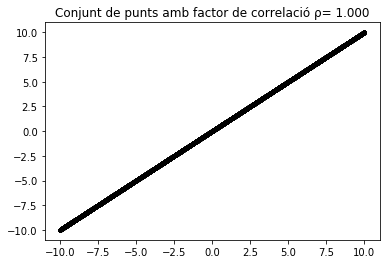

In [ ]:
#2.
plt.plot(x,y,'k.')
plt.title('Conjunt de punts amb factor de correlació ρ= %1.3f' %R)

plt.show()

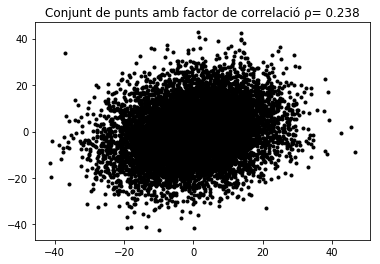

In [ ]:
#3. 

S=10 #El valor de la desviación de la normal. Se puede cambiar si se desea

x  = x+ss.norm.rvs(0,S,10000)
y  = y+ss.norm.rvs(0,S,10000)

Cov= np.cov([x,y])

C  = Cov[0,1] #covarianza de x e y
Sx = np.sqrt(Cov[0,0]) #desviación de x
Sy = np.sqrt(Cov[1,1]) #desviación de y, aunque en este caso será igual a la de x

R  = C/(Sx*Sy)

plt.plot(x,y,'k.')
plt.title('Conjunt de punts amb factor de correlació ρ= %1.3f' %R)

plt.show()

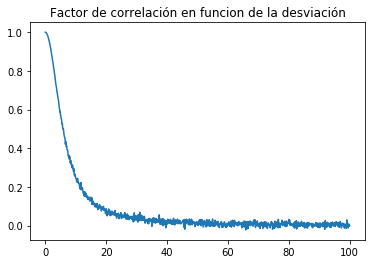

In [ ]:
S  = np.linspace(0,100,1000)
x=np.random.uniform(-10,10,10000)
y=x

def R(s,x,y): #Para ahorrar líneas y simplificar, definimos la función correlación para cada sigma dados dos conjuntos de puntos. Lo podríamos haber hecho al principio, pero no tendría sentido si no íbamos a repetir el proceso muchas veces.
  X  = x+ss.norm.rvs(0,s,10000)
  Y  = y+ss.norm.rvs(0,s,10000)
  Cov= np.cov([X,Y])
  C  = Cov[0,1] #covarianza de X e Y
  SX = np.sqrt(Cov[0,0]) #desviación de X
  SY = np.sqrt(Cov[1,1]) #desviación de Y, aunque en este caso será igual a la de X
  r  = C/(SX*SY)
  return r

R_array = np.empty(1000)

for i in range(1000):
  R_array[i]=R(S[i],x,y)
  
plt.plot(S,R_array)
plt.title('Factor de correlación en funcion de la desviación')

plt.show()


### Ejercicio 2.

Considera la función $y = x^2+10$ en el intervalo $[0,4]$. 

1.  Define las funciones de python para la función $y$ y su integral calculada analíticamente.

2.  Usa el método MC para calcular el área de una región limitada por la función $y$ en $[0,4]$ y las rectas $x=1$ e $y=0.1$. Implementa una función que evalúe el error cometido en tal cálculo para un número de puntos $N$ arbitrario en $[0,4]$ $\,\,\,\left(\text{Error} = |I_{MC} - I_\text{analítica}|\right)$.

3.  Para $N=10000$ haz una gráfica de los puntos aceptados en la región anterior, incluyendo también la gráfica de la función $y$ así como las rectas $x=1$ e $y=0.1$.

4.  Haz una gráfica del valor de la integral MC como función de $N$, tomando 10 valores de $N$ entre 1000 y 10000. Muestra también cómo el error definido anteriormente disminuye con el número de puntos.


In [ ]:
#1.

def y(x):
  f=x**2+10
  return f

def Y(a,b): #Integral de a a b de y(x)
  f=(b**3)/3+10*b-(a**3)/3-10*a
  return f

In [ ]:
#2.
#Al introducir las fronteras, el área queda reducida a: Y(1,4)-0.1*3=Y(1,4)-0.3

N=100000                         #Número de puntos. Se puede cambiar si se desea.
A_r=Y(1,4)-0.3                   #Área analítica
A_t=(26-0.1)*(4-1)               #Área total del rectángulo en que trabajamos

Px=np.random.uniform(1,4,N)      #Generamos coordenadas x entre los límites de integración
Hx=y(Px)                         #Evaluamos la funcion en cada una de estas coordenadas x
Py=np.random.uniform(0.1,26,N)   #Generamos coordenadas y entre el máximo de la función y la frontera inferior.

acep = Py<=Hx                    #Escogemos los puntos tales que y<=y(x)
frac = Py[acep].size/Py.size     #Fracción de los puntos que han sido aceptados

A=A_t*frac                       #Área de Monte Carlo
E=abs(A-A_r)

print('El área analítica es A=',A_r)
print('Mientras que el área calculada con MC, con N=',N,'es A=',A)
print('En este caso el error es E=',E)

def Err(N):                      #Defino esta función que calcula de manera independiente el error, no requiere de los calculos anteriores, aunque no la uso.
  A_r=Y(1,4)-0.3 #Área analítica
  Px=np.random.uniform(1,4,N)
  Hx=y(Px)
  Py=np.random.uniform(0.1,26,N)
  acep = Py<=Hx
  frac = Py[acep].size/Py.size
  A=(26-0.1)*(4-1)*frac #Área de Monte Carlo
  E=abs(A-A_r)
  return E

El área analítica es A= 50.699999999999996
Mientras que el área calculada con MC, con N= 100000 es A= 50.743539
En este caso el error es E= 0.04353900000000266


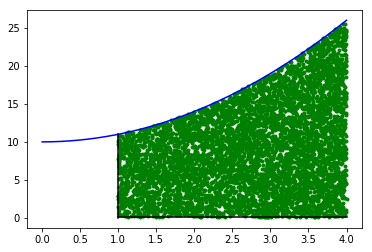

In [ ]:
#3.
N=10000

Px=np.random.uniform(1,4,N)
Hx=y(Px)
Py=np.random.uniform(0.1,26,N)

acep = Py<=Hx

plt.plot(Px[acep],Py[acep],'g.')

Fx=np.linspace(0,4,1000)
Fy=y(Fx)

plt.plot(Fx,Fy,'b')
plt.plot([1,4],[0.1,0.1],'k')
plt.plot([1,1],[0,11],'k')

plt.show()

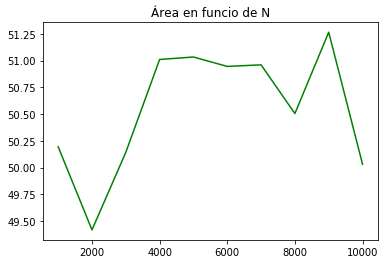

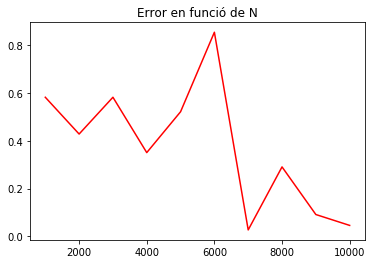

In [ ]:
#4.

N=[1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]

def A(N):
  A_t=(26-0.1)*(4-1)
  Px=np.random.uniform(1,4,N)
  Hx=y(Px)
  Py=np.random.uniform(0.1,26,N)
  acep = Py<=Hx
  frac = Py[acep].size/Py.size
  A=A_t*frac
  return A

Area=np.empty(10)
Error=np.empty(10)

for i in range(10):
  Area[i]=A(N[i])
  Error[i]=Err(N[i])

plt.plot(N,Area,'g')
plt.title('Área en funcio de N')
plt.show()

plt.plot(N,Error,'r')
plt.title('Error en funció de N')
plt.show()


### Ejercicio 3. 

Consideremos un tirachinas que dispara una bola de hierro desde el suelo ($y_0=0$) con cierto ángulo $θ_0$ menor de 90º  con la horizontal. En el caso ideal la ecuación de la trayectoria $y(x)$ de la bola se puede escribir como:

$$
y(x) = tan(\theta_0)·x - \frac{g·x^2}{2·v_0^2·cos^2(\theta_0)}
$$

donde $\theta_0$ es  el ángulo de tiro, y $v_0$ es la velocidad inicial de la bola. El alcance máximo de la bola en este caso ideal es de:

$$
x_{max} = \frac{v_0^2·sin(2·\theta_0)}{g}
$$

Imagina que delante de ti, a una distancia de $150$ $m$ tienes una pared de $20$ $m$ de altura, y dispones de un tirachinas e infinitas bolas para tirar... 

1. Si tiras una bola con el tirachinas con un $\theta_0 = 25º$ y $v_0 = 50$ $m/s$, pasará por encima del muro? Haz una representación gráfica de la trayectória de la bola, y el muro, en un plano $(x,y)$. Asume $g = 9.81$ $m/s^2$ durante todo el ejercicio.

2. Después de unos intentos, te das cuenta que no eres muy preciso tirando bolas con el tirachinas. Tus tiros tienen una $v_0$ y un $\theta_0$ que siguen unas distribuciones normales, centradas en  $\theta_0 = 25º$ y $v_0 = 50$ $m/s$, y con unas desviaciones estandares de un $4\%$ y $2\%$ en el ángulo de tiro y la velocidad inicial, respectivamente ($\sigma_{\theta} = 0.04·\theta_0$,  $\sigma_{v_0} = 0.02·v_0$). Si tiras 10 bolas, eres capaz de traspasar el muro en alguno de los tiros? En cuantos? Este valor fluctúa mucho si haces varias realizaciones de tirar 10 bolas?

3. Repites esta experiencia muchas veces ($N_{tiros}$). Quieres estimar la probabilidad $\hat{p}$ de que pasen las bolas por encima del muro. Dibuja como evoluciona el error relativo (es decir, $\sigma[\hat{p}]/\hat{p}$, en porcentaje) con el número de bolas tiradas hasta que este error sea $<1\%$. Cuántas bolas gastarás para poder hacer esta estimación de $\hat{p}$ con un error menor del $1\%$? Cuál es la probabilidad $\hat{p}$ que obtienes al final, y su error $\sigma[\hat{p}]$? (recuerda que tienes infinitas cajas de bolas a tu disposición... te puede salir 'cara' la experiencia!). **NOTA:** Que una bola pase o no sigue una distribución binomial, donde los estimadores de $\hat{p}$ y varianza de $\hat{p}$ son:

$$
\hat{p} = \frac{N_{pasan}}{N_{tiros}}
\\
$$

$$
var[\hat{p}] = \frac{p(1-p)}{N_{tiros}} ; \,\,\,\ \sigma[\hat{p}] = \sqrt{var[\hat{p}]}
\\
$$

La pelota no pasará por encima del muro, pero sí llegará a golpearlo.


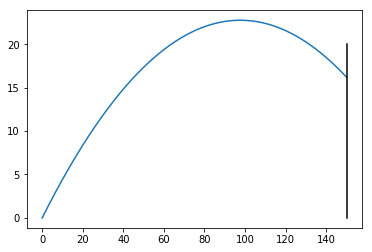

De las primeras 10, he conseguido pasar 0 .
Tras 1000 tandas de 10 bolas, he conseguido pasar una media de 1.068 bolas por tanda.
No soy muy bueno, pero al hacer más de 10 intentos parece que mis expectativas han mejorado.
Sin embargo, al poco se estancan cerca de un número no mucho mayor que 1 de cada 10 bolas

La probabilidad que he calculado con 10 bolas es p= 0.1
Con un error relativo E= 0.9486832980505139

La probabilidad que he calculado con 100 bolas es p= 0.15
Con un error relativo E= 0.2380476142847617

La probabilidad que he calculado con 1000 bolas es p= 0.115
Con un error relativo E= 0.08772486633739059

La probabilidad que he calculado con 10000 bolas es p= 0.1079
Con un error relativo E= 0.028753852947286558

La probabilidad que he calculado con 100000 bolas es p= 0.11259
Con un error relativo E= 0.008877940899847888

Con 1000000 bolas, he conseguido reducir el error relativo a E= 0.008877940899847888 y he obtenido
una probabilidad p= 0.11259 con error absoluto σ= 0.00099

In [ ]:
# Ajuda: Funció trajectòria y(x), per un theta i v determinats
def h(x, theta, v):
  return np.tan(theta)*x - (9.81*x**2)/(2.*(v**2)*(np.cos(theta))**2)

# Ajuda: Funció x_max, per un theta i v determinats
def xmax(theta, v):
  return v**2*np.sin(2*theta)/(9.81)

# Ajuda: Definició de variables a emprar en el codi
th0=25.*np.pi/180.
v0=50.
Sigmath=0.04*th0
Sigmav=0.02*v0
x_pared=150.
h_pared=20.

# Have fun below...

#1.

pasar='no'
llegar='pero sí llegará a golpearlo.'
if xmax(th0,v0) >= x_pared: #Lo primero es comprobar que no caerá al suelo antes de llegar la muro.
  if h(x_pared,th0,v0) >= h_pared: #Lo segundo es comprobar si pasará por encima de la pared.
    pasar='sí'
else:
  llegar='caerá antes al suelo.'
  
print('La pelota',pasar,'pasará por encima del muro,',llegar)

X=np.linspace(0,150,1000)
Y=h(X,th0,v0)

plt.plot(X,Y)
plt.plot([x_pared,x_pared],[0,h_pared],'k')
plt.show()

#2.

pr=1
buenas=0

for i in range(1000):
  th=ss.norm.rvs(th0,Sigmath,10)
  v=ss.norm.rvs(v0,Sigmav,10)
  for j in range(10):
    if h(x_pared,th[j],v[j]) >= h_pared:
      buenas=buenas+1
  if pr==1:
    pr=pr-1
    print('De las primeras 10, he conseguido pasar',buenas,'.')
media=buenas/1000

print('Tras 1000 tandas de 10 bolas, he conseguido pasar una media de', media,'bolas por tanda.')
print('No soy muy bueno, pero al hacer más de 10 intentos parece que mis expectativas han mejorado.')
print('Sin embargo, al poco se estancan cerca de un número no mucho mayor que 1 de cada 10 bolas')

#3.

N=10 #Número de tiros, se puede cambiar si se desea
E=1
while E>=0.01:
  buenas=0
  th=ss.norm.rvs(th0,Sigmath,N)
  v=ss.norm.rvs(v0,Sigmav,N)
  for j in range(N):
    if h(x_pared,th[j],v[j]) >= h_pared:
      buenas=buenas+1
  p=buenas/N
  print()
  print('La probabilidad que he calculado con',N,'bolas es p=',p)
  E=np.sqrt(p*(1-p)/N)/p
  print('Con un error relativo E=',E)
  N=10*N
print()
print('Con',N,'bolas, he conseguido reducir el error relativo a E=',E,'y he obtenido')
Eabs=E*p
print('una probabilidad p=',p,'con error absoluto σ=',Eabs)
  

**Atenció** Recordeu que un cop entregat heu d'apuntar l'hora de sortida al portàtil del Sergio.

**Atenció 2** Abans d'entregar, podeu assegurar-vos de que el vostre codi s'executa correctament fent: *Entorno de ejecución >> Reiniciar entorno de ejecución* , i després fent *Entorno de ejecución >> Ejecutar todas* 